In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [3]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_excel('/content/drive/MyDrive/DS Data Sets/Forecasting/Airlines+Data.xlsx')

In [8]:
df.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [10]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [17]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

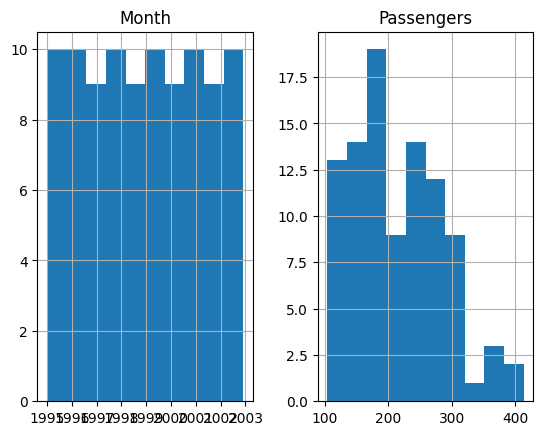

In [14]:
# Histogram
df.hist()
pyplot.show()

<Axes: ylabel='Density'>

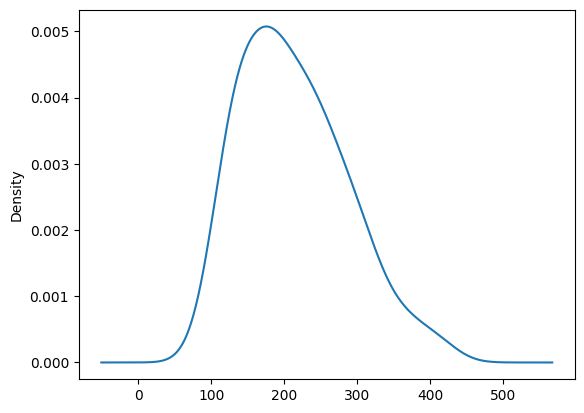

In [16]:
df.Passengers.plot(kind='kde')

In [19]:
import statsmodels.api as smf

<Axes: xlabel='Month', ylabel='Passengers'>

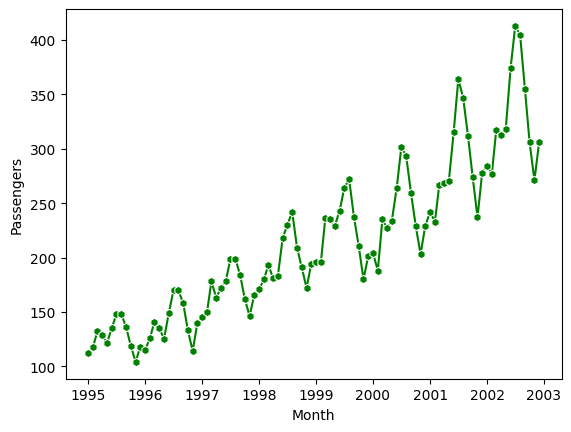

In [20]:
sns.lineplot(x='Month',y='Passengers',data=df,color='green',marker='h')

In [ ]:
import statsmodels.tsa.seasonal as smf_tsa
from statsmodels.tsa.seasonal import seasonal_decompose
help(smf_tsa.seasonal_decompose)

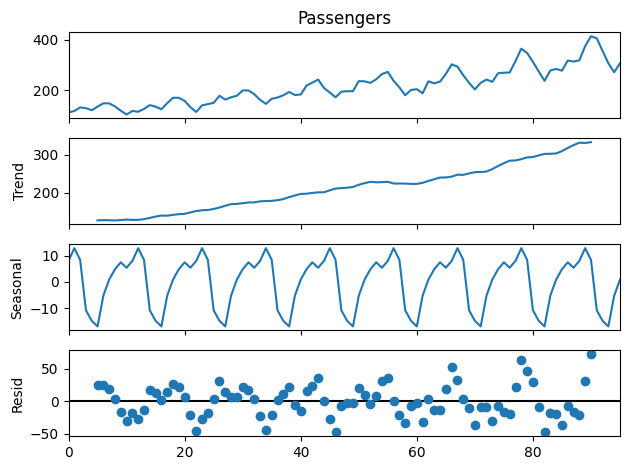

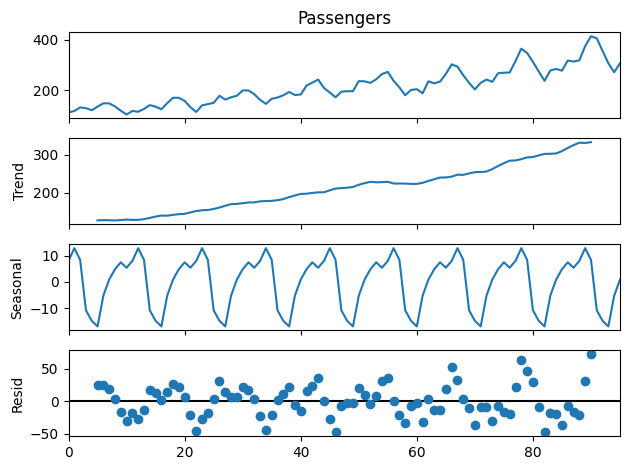

In [32]:
seasonal_ts_add=smf_tsa.seasonal_decompose(df['Passengers'],period =11)
seasonal_ts_add.plot()

In [34]:
df['Month']=pd.to_datetime(df['Month'])
df['Months']=df['Month'].dt.strftime('%b')
df.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


<Axes: ylabel='Passengers'>

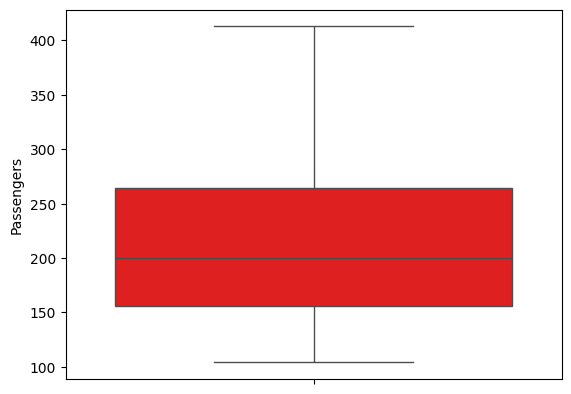

In [36]:
sns.boxplot(data=df['Passengers'],color='red')

In [37]:
month_dummies=pd.DataFrame(pd.get_dummies(df['Months']))
df1=pd.concat([df,month_dummies],axis=1)
df1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [38]:
df1['t']=np.arange(1,97)
df1['t_squared']=df1['t']*df1['t']
df1['log_Passengers']=np.log(df1['Passengers'])
df1.columns
df1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [39]:
Train=df1.head(50)
Test=df1.tail(50)

In [40]:
import statsmodels.formula.api as smf

In [45]:
# RMSE
linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

44.252225771464815

In [49]:
Exp = smf.ols('log_Passengers~t', data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

38.42264020611436

In [51]:
Quad=smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad=pd.Series(Quad.predict(Test[['t','t_squared']]))

In [52]:
rmse_Quad=np.sqrt(np.mean(np.array(Test['Passengers'])-np.array(pred_Quad))**2)
rmse_Quad

3.9110536522320847

In [59]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                                               'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]))


In [62]:
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_add_sea))**2))
rmse_add_sea

116.42716693280823

In [64]:
import statsmodels.formula.api as smf

In [68]:
Train.columns

Index(['Month', 'Passengers', 'Months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared',
       'log_Passengers'],
      dtype='object')

In [75]:
Mul_sea=smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_Mult_sea=pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

118.76785309644444

In [77]:
data1={'Model':pd.Series(['rmse_linear','rmse_Exp','rmse_add_sea','rmse_Mult_sea'])}
table_rmse=pd.DataFrame(data1)
table_rmse

,Model
0,rmse_linear
1,rmse_Exp
2,rmse_add_sea
3,rmse_Mult_sea


In [78]:
t=np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [79]:
t_squared=np.array(t*t)
t_squared

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [80]:
data=[['2003-01-01','Jan'],['2003-02-01','Feb'],['2003-03-01','Mar'],['2003-04-01','Apr'],['2003-05-01','May'],
      ['2003-06-01','Jun'],['2003-07-01','Jul'],['2003-08-01','Aug'],['2003-09-01','Sep'],['2003-10-01','Oct'],
      ['2003-11-01','Nov'],['2003-12-01','Dec']]

In [81]:
forecast=pd.DataFrame(data,columns=['Date','Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-05-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [85]:
dummies=pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1=pd.concat([forecast,dummies],axis=1)

In [87]:
forecast1['t']=np.arange(1,13)
forecast1['t_squared']=forecast1['t']*forecast1['t']
forecast1

,Date,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared
0,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,2003-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25
5,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0,6,36
6,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0,7,49
7,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,8,64
8,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,9,81
9,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,10,100


In [88]:
forecast1.head()

,Date,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared
0,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,2003-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25


In [90]:
model_full=smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=df1).fit()
pred_new=pd.Series(model_full.predict(forecast1))

In [91]:
forecast1['Forecasted_log']=pd.Series(pred_new)
forecast1['Forecasted_Passengers']=np.exp(forecast1['Forecasted_log'])

In [92]:
predict=forecast1.loc[:,['Date','Forecasted_Passengers']]
predict

,Date,Forecasted_Passengers
0,2003-01-01,109.176148
1,2003-02-01,110.331245
2,2003-03-01,127.315234
3,2003-04-01,123.200587
4,2003-05-01,122.399578
5,2003-06-01,138.536397
6,2003-07-01,154.066959
7,2003-08-01,153.741209
8,2003-09-01,137.693733
9,2003-10-01,120.894736
